# ANÁLISIS DE FUERZAS INTERNAS
La viga en voladizo ABCD mostrada en la Figura 1 esta solicitada a una carga distribuida de magnitud máxima 4,8 kN/m y con distribución trapezoidal por los elementos que soporta. Además, sobre la viga actúan cargas concentradas de 3 kN y 8 kN, correspondientes a un equipo y un cable dispuestos para fines recreativos.
![Figura 1](viga.png)
Teniendo en cuenta los valores de `L1 = 0.25m`, `L2 = 0.5m` y `L3 = 2m`, se determinaron las siguientes ecuaciones que representan el diagrama de fuerza cortante para cada tramo:

$$
V(x) = \left\{
    \begin{array}\\
        -9.6x^{2} + 2.8 & \mbox{Tramo 1: } 0 < x <0.25 \\
        - 4.8x - 0.8 & \mbox{Tramo 2: } 0 < x < 0.5\\
        1.2x^{2} - 4.8x + 4.8 & \mbox{Tramo 3: } 0 < x < 2
    \end{array}
\right.
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [70]:
x_1 = np.arange(0, 2.8, 0.005)

In [71]:
y = np.piecewise(x_1, [(x_1 < 0.25), ((x_1 >= 0.25) & (x_1 < 0.75)), (x_1 >= 0.75)], 
                 [lambda x: -9.6 * x ** 2 + 2.8, lambda x: -4.8 * (x - 0.25) - 0.8, lambda x: 1.2 * (x - 0.75) ** 2 - 4.8 * (x - 0.75) + 4.8])

<function matplotlib.pyplot.show(close=None, block=None)>

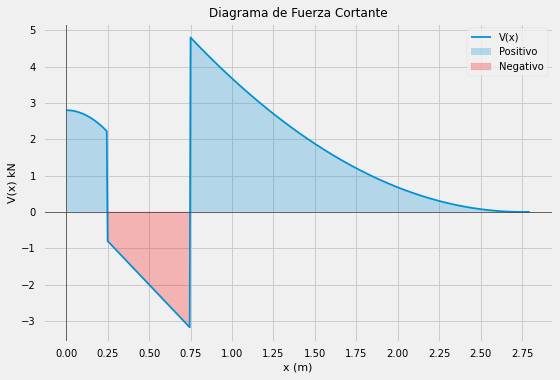

In [73]:
plt.style.use('seaborn-notebook')

# plot
plt.plot(x_1, y, label='V(x)')
# relleno
plt.fill_between(x_1, y, where=(y > 0), interpolate=True, alpha=0.25, label='Positivo')
plt.fill_between(x_1, y, where=(y <= 0), interpolate=True, alpha=0.25, label='Negativo', color='red')

# horizontal line
plt.axhline(y=0, color='#444444', linewidth=0.75)
plt.axvline(x=0, color='#444444', linewidth=0.75)

# settings
plt.title('Diagrama de Fuerza Cortante')
plt.xlabel('x (m)')
plt.ylabel('V(x) kN')
plt.xticks(np.arange(0, 3, 0.25))

# legend
plt.legend()

plt.tight_layout()
plt.show

Las ecuaciones obtenidas para el diagrama de momento flector son:

$$
M(x) = \left\{
    \begin{array}\\
        -3.2x^{3} + 2.8x - 2.85 & \mbox{Tramo 1: } 0 < x <0.25 \\
        - 2.4x^{2} - 0.8x -2.2 & \mbox{Tramo 2: } 0 < x < 0.5\\
        0.4x^{3} - 2.4x^{2} + 4.8x -3.2 & \mbox{Tramo 3: } 0 < x < 2
    \end{array}
\right.
$$

In [74]:
x_2 = np.arange(0, 2.8, 0.005)

In [75]:
y_2 = np.piecewise(x_2, [(x_2 < 0.25), ((x_2 >= 0.25) & (x_2 < 0.75)), (x_2 >= 0.75)],
                   [lambda x: -3.2 * x ** 3 + 2.8 * x -2.85, lambda x: -2.4 * (x - 0.25) ** 2  -0.8 * (x - 0.25)- 2.2, lambda x: 0.4 * (x - 0.75) ** 3 - 2.4 * (x - 0.75) ** 2 + 4.8 * (x - 0.75) -3.2])

<function matplotlib.pyplot.show(close=None, block=None)>

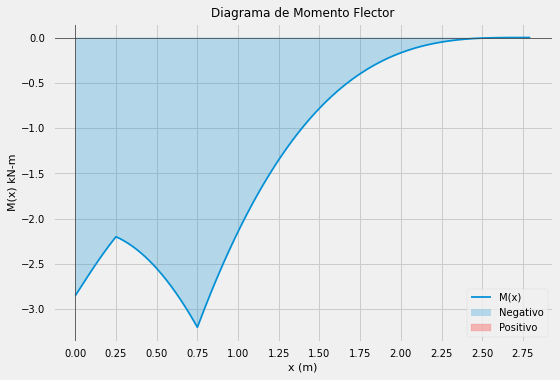

In [76]:
plt.style.use('seaborn-notebook')

# plot
plt.plot(x_2, y_2, label='M(x)')
# relleno
plt.fill_between(x_2, y_2, where=(y_2 <= 0), interpolate=True, alpha=0.25, label='Negativo')
plt.fill_between(x_2, y_2, where=(y_2 > 0), interpolate=True, alpha=0.25, label='Positivo', color='red')


# horizontal line
plt.axhline(y=0, color='#444444', linewidth=0.75)
plt.axvline(x=0, color='#444444', linewidth=0.75)

# settings
plt.title('Diagrama de Momento Flector')
plt.xlabel('x (m)')
plt.ylabel('M(x) kN-m')
plt.xticks(np.arange(0, 3, 0.25))

# legend
plt.legend()

plt.tight_layout()
plt.show

En caso de querer visualizar ambos gráficos al mismo tiempo, se usa el método `plt.subplot`

<function matplotlib.pyplot.show(close=None, block=None)>

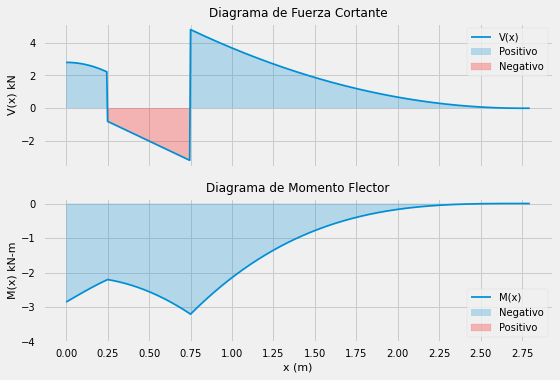

In [78]:
fig, (axis1, axis2) = plt.subplots(nrows=2, ncols=1, sharex=True)

plt.style.use('seaborn-notebook')


# DFC
axis1.plot(x_1, y, label='V(x)')
# relleno
axis1.fill_between(x_1, y, where=(y > 0), interpolate=True, alpha=0.25, label='Positivo')
axis1.fill_between(x_1, y, where=(y <= 0), interpolate=True, alpha=0.25, label='Negativo', color='red')

# settings
axis1.set_title('Diagrama de Fuerza Cortante')
axis1.set_ylabel('V(x) kN')
axis1.set_xticks(np.arange(0, 3, 0.25))
axis1.legend()

#DMF

# plot
axis2.plot(x_2, y_2, label='M(x)')
# relleno
axis2.fill_between(x_2, y_2, where=(y_2 <= 0), interpolate=True, alpha=0.25, label='Negativo')
axis2.fill_between(x_2, y_2, where=(y_2 > 0), interpolate=True, alpha=0.25, label='Positivo', color='red')

# settings
axis2.set_title('Diagrama de Momento Flector')
axis2.set_xlabel('x (m)')
axis2.set_ylabel('M(x) kN-m')
axis2.set_xticks(np.arange(0, 3, 0.25))
axis2.set_yticks(np.arange(-4, 0.5, 1))

# legend
axis2.legend(loc='lower right')

fig.tight_layout()
plt.show

Se determinan los cortantes máximos y mínimos, junto con su localización en la viga:

In [80]:
v_min, v_max = min(y), max(y)
v_max

4.8

In [89]:
v_max_posicion = x_1[np.where(y == v_max)]
# posicion en metros
v_max_posicion

array([0.75])

De igual forma, se determina la magnitud de los momentos flectores máximos y mínimos, junto con su localización en la viga:

In [86]:
m_max, m_min = min(y_2), max(y_2)
# en kN-m
m_max

-3.2

In [88]:
m_max_posicion = x_2[np.where(y_2 == m_max)]
# posicion en metros
m_max_posicion

array([0.75])

# PERFIL ÓPTIMO
El perfil `tipo C` mostrado en la Figura 2 corresponde a la sección transversal que se solicita asignar a la viga, la cual se proyecta en acero `A-36` con esfuerzo normal de `250 MPa`. Queriendo conocer cuáles son las dimensiones óptimas para soportar una solicitación de momento flector alrededor de “z”, se usará la magnitud máxima del momento flector obtenida anteriormente.
![Perfil C](perfil1.png)

In [11]:
import pandas as pd

Los perfiles usados para el análisis se muestran en el siguiente `dataframe` obtenido con base en datos de un archivo de Excel

In [12]:
df = pd.read_excel('T2.xlsx', usecols='A:D', nrows=10, skiprows=2, index_col='perfil')
df

,h [mm],b [mm],t [mm]
perfil,,,
1,76,36,5
2,76,38,5
3,102,40,6
4,102,44,6
5,127,45,7
6,127,48,7
7,152,49,8
8,152,52,8
9,178,53,9


Como ejemplo para determinar los esfuerzos de todos los perfiles, se toman las medidas el primer perfil y con base en estas se realizan los siguiente cálculos tipo:

In [13]:
h = df.loc[1, 'h [mm]']
b = df.loc[1, 'b [mm]']
t = df.loc[1, 't [mm]']

In [14]:
A = (h * t) + (2 * (b - t) * t)
# mm2
A

690

In [15]:
Iz = (t * h ** 3 / 12) +  ((b - t) * t ** 3 / 6) + (2 * (b - t) * t * (h / 2 - t / 2) ** 2)

In [16]:
# mm4
Iz

574230.0

In [17]:
y = h / 2

In [18]:
# mm
y

38.0

In [19]:
Mmáx = min(y_2)
Mmáx

-3.2

In [20]:
esf_normal = Mmáx * 10 ** 6 * y / Iz

In [21]:
# en N/mm2
esf_normal

-211.7618375912091

Se obtienen los datos de todas las áreas y se agrega una nueva columna al dataframe.

In [22]:
df['A [mm2]'] = df['h [mm]'] * df['t [mm]'] + 2 * (df['b [mm]'] - df['t [mm]']) * df['t [mm]']
df

,h [mm],b [mm],t [mm],A [mm2]
perfil,,,,
1,76,36,5,690
2,76,38,5,710
3,102,40,6,1020
4,102,44,6,1068
5,127,45,7,1421
6,127,48,7,1463
7,152,49,8,1872
8,152,52,8,1920
9,178,53,9,2394


Se procede a determinar las inercias de cada perfil y agregar su respectiva columna al dataframe

In [23]:
# axis=columns
Iz = df.apply(lambda row: row['t [mm]'] * row['h [mm]'] ** 3 / 12 + (row['b [mm]'] - row['t [mm]']) * row['t [mm]'] ** 3 / 6 \
         + 2 * (row['b [mm]'] - row['t [mm]']) * row['t [mm]'] * (row['h [mm]'] / 2 - row['t [mm]'] / 2) ** 2, axis=1)
df['Iz [mm4]'] = Iz
df

,h [mm],b [mm],t [mm],A [mm2],Iz [mm4]
perfil,,,,,
1,76,36,5,690,5.742300e+05
2,76,38,5,710,5.994767e+05
3,102,40,6,1020,1.471860e+06
4,102,44,6,1068,1.582596e+06
5,127,45,7,1421,3.112262e+06
6,127,48,7,1463,3.263634e+06
7,152,49,8,1872,5.745408e+06
8,152,52,8,1920,5.994496e+06
9,178,53,9,2394,9.890238e+06


Se agrega otra columna que contiene el centroide de cada perfil con base en el `eje y`

In [24]:
# centroides
df['y [mm]'] = df['h [mm]'] / 2
df

,h [mm],b [mm],t [mm],A [mm2],Iz [mm4],y [mm]
perfil,,,,,,
1,76,36,5,690,5.742300e+05,38.0
2,76,38,5,710,5.994767e+05,38.0
3,102,40,6,1020,1.471860e+06,51.0
4,102,44,6,1068,1.582596e+06,51.0
5,127,45,7,1421,3.112262e+06,63.5
6,127,48,7,1463,3.263634e+06,63.5
7,152,49,8,1872,5.745408e+06,76.0
8,152,52,8,1920,5.994496e+06,76.0
9,178,53,9,2394,9.890238e+06,89.0


Finalmente, se determinan los esfuerzos a los que se sometería cada perfil y se agrega esta nueva columna al dataframe

In [25]:
esfuerzos = Mmáx * 10 ** 6 * df['y [mm]'] / df['Iz [mm4]']
df['Esf [MPa]'] = esfuerzos
df

,h [mm],b [mm],t [mm],A [mm2],Iz [mm4],y [mm],Esf [MPa]
perfil,,,,,,,
1,76,36,5,690,5.742300e+05,38.0,-211.761838
2,76,38,5,710,5.994767e+05,38.0,-202.843591
3,102,40,6,1020,1.471860e+06,51.0,-110.880111
4,102,44,6,1068,1.582596e+06,51.0,-103.121706
5,127,45,7,1421,3.112262e+06,63.5,-65.290124
6,127,48,7,1463,3.263634e+06,63.5,-62.261885
7,152,49,8,1872,5.745408e+06,76.0,-42.329457
8,152,52,8,1920,5.994496e+06,76.0,-40.570550
9,178,53,9,2394,9.890238e+06,89.0,-28.796071


Finalmente, se determinan cuáles son los perfiles que soportan un esfuerzo inferior al admisible y se obtiene el perfil tipo C deseado.
> Este perfil será el de menor área

In [26]:
esf_admisible = 250 

In [27]:
# perfil optimo
filt = -df['Esf [MPa]'] <= esf_admisible

In [28]:
# áreas de los perfiles que cumplen
df.loc[filt, 'A [mm2]']

perfil
1      690
2      710
3     1020
4     1068
5     1421
6     1463
7     1872
8     1920
9     2394
10    2448
Name: A [mm2], dtype: int64

In [29]:
# Método min
area_minima = df.loc[filt, 'A [mm2]'].min()
area_minima

690

In [30]:
index = df.loc[filt, 'A [mm2]'].idxmin()
index

1

In [90]:
# PERFIL OPTIMO
perfil_1 = df.loc[[index], ['h [mm]', 'b [mm]', 't [mm]']]
perfil_1

,h [mm],b [mm],t [mm]
perfil,,,
1,76,36,5


In [32]:
# Tabla final para exportar a Excel
table_1 = df.iloc[:, -4:]
table_1

,A [mm2],Iz [mm4],y [mm],Esf [MPa]
perfil,,,,
1,690,5.742300e+05,38.0,-211.761838
2,710,5.994767e+05,38.0,-202.843591
3,1020,1.471860e+06,51.0,-110.880111
4,1068,1.582596e+06,51.0,-103.121706
5,1421,3.112262e+06,63.5,-65.290124
6,1463,3.263634e+06,63.5,-62.261885
7,1872,5.745408e+06,76.0,-42.329457
8,1920,5.994496e+06,76.0,-40.570550
9,2394,9.890238e+06,89.0,-28.796071


## SECCIÓN INVERTIDA
En otro instante de tiempo se decide rotar la sección 90° como muestra la Figura 3. Se procede a determinar nuevamente esfuerzos para establecer cuál es la sección óptima para este caso.
![Perfil Invertido](perfil2.png)

In [33]:
# tabla de perfiles
table_2 = df.loc[:, :'A [mm2]']
table_2

,h [mm],b [mm],t [mm],A [mm2]
perfil,,,,
1,76,36,5,690
2,76,38,5,710
3,102,40,6,1020
4,102,44,6,1068
5,127,45,7,1421
6,127,48,7,1463
7,152,49,8,1872
8,152,52,8,1920
9,178,53,9,2394


In [34]:
# cálculo tipo de centroide del perfil 1 en el eje y
centroide_1 = (((b - t) ** 2 * t) + h * t * (b - t / 2))  / table_2.loc[1, 'A [mm2]']
centroide_1

25.41304347826087

In [35]:
# aplicando la misma fórmula al dataframe
centroides = ((df['b [mm]'] - df['t [mm]']) ** 2 * df['t [mm]'] \
              + df['h [mm]'] * df['t [mm]'] * (df['b [mm]'] - df['t [mm]'] / 2)) / df['A [mm2]']

table_2['y [mm]'] = centroides
table_2

,h [mm],b [mm],t [mm],A [mm2],y [mm]
perfil,,,,,
1,76,36,5,690,25.413043
2,76,38,5,710,26.669014
3,102,40,6,1020,29.000000
4,102,44,6,1068,31.606742
5,127,45,7,1421,33.076355
6,127,48,7,1463,35.083732
7,152,49,8,1872,36.414530
8,152,52,8,1920,38.466667
9,178,53,9,2394,39.733083


In [36]:
# cálculo de las inercias en Z
I_z = (table_2['h [mm]'] * table_2['t [mm]'] ** 3 / 12 + table_2['h [mm]'] * table_2['t [mm]'] * ((table_2['b [mm]'] - table_2['t [mm]'] / 2) - table_2['y [mm]']) ** 2 \
      + (table_2['b [mm]'] - table_2['t [mm]']) ** 3 *  table_2['t [mm]'] / 6 + 2 * (table_2['b [mm]'] - table_2['t [mm]']) * table_2['t [mm]'] * ((table_2['b [mm]'] - table_2['t [mm]']) / 2 -  table_2['y [mm]']) ** 2 )

table_2['Iz [mm4]'] = I_z
table_2

,h [mm],b [mm],t [mm],A [mm2],y [mm],Iz [mm4]
perfil,,,,,,
1,76,36,5,690,25.413043,80932.282609
2,76,38,5,710,26.669014,94498.884977
3,102,40,6,1020,29.000000,139060.000000
4,102,44,6,1068,31.606742,183178.831461
5,127,45,7,1421,33.076355,236141.382184
6,127,48,7,1463,35.083732,284943.409490
7,152,49,8,1872,36.414530,354158.324786
8,152,52,8,1920,38.466667,421469.866667
9,178,53,9,2394,39.733083,510771.439850


In [37]:
# cálculo de los esfuerzos
table_2['Esf [MPa]'] = Mmáx * 10 ** 6 * table_2['y [mm]'] / table_2['Iz [mm4]']
table_2

,h [mm],b [mm],t [mm],A [mm2],y [mm],Iz [mm4],Esf [MPa]
perfil,,,,,,,
1,76,36,5,690,25.413043,80932.282609,-1004.812128
2,76,38,5,710,26.669014,94498.884977,-903.088381
3,102,40,6,1020,29.000000,139060.000000,-667.337840
4,102,44,6,1068,31.606742,183178.831461,-552.146622
5,127,45,7,1421,33.076355,236141.382184,-448.224424
6,127,48,7,1463,35.083732,284943.409490,-394.000840
7,152,49,8,1872,36.414530,354158.324786,-329.023738
8,152,52,8,1920,38.466667,421469.866667,-292.057257
9,178,53,9,2394,39.733083,510771.439850,-248.929080


In [38]:
# perfiles que se encuentran por debajo del esfuerzo admisible
filt = -table_2['Esf [MPa]'] <= esf_admisible
table_2.loc[filt]

,h [mm],b [mm],t [mm],A [mm2],y [mm],Iz [mm4],Esf [MPa]
perfil,,,,,,,
9,178,53,9,2394,39.733083,510771.439850,-248.929080
10,178,56,9,2448,41.823529,600595.764706,-222.837559


In [57]:
perfil_deseado_2 = table_2.loc[filt, 'A [mm2]'].idxmin()
perfil_2 = table_2.loc[[perfil_deseado_2], :'t [mm]']

In [58]:
# dimensiones del perfil óptimo
perfil_2

,h [mm],b [mm],t [mm]
perfil,,,
9,178,53,9


In [68]:
# tabla final a exportar
df_2 = table_2.loc[:, ['A [mm2]', 'Iz [mm4]', 'y [mm]', 'Esf [MPa]']]
df_2

,A [mm2],Iz [mm4],y [mm],Esf [MPa]
perfil,,,,
1,690,80932.282609,25.413043,-1004.812128
2,710,94498.884977,26.669014,-903.088381
3,1020,139060.000000,29.000000,-667.337840
4,1068,183178.831461,31.606742,-552.146622
5,1421,236141.382184,33.076355,-448.224424
6,1463,284943.409490,35.083732,-394.000840
7,1872,354158.324786,36.414530,-329.023738
8,1920,421469.866667,38.466667,-292.057257
9,2394,510771.439850,39.733083,-248.929080


Finalmente, se toman las tablas y datos de perfiles con el fin de exportarlos a un archivo Excel usando la librería `openpyxl` y el método `to_excel` del dataframe.

In [53]:
from openpyxl import load_workbook

In [67]:
with pd.ExcelWriter('T2.xlsx', mode='a', engine='openpyxl') as writer:  
    # configurando sheets
    book = load_workbook('T2.xlsx')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    
    # colcando los dataframes en sus respectivas posiciones
    table_1.to_excel(writer, startrow=2, startcol=6, sheet_name='Perfiles')
    df_2.to_excel(writer, startrow=16, startcol=6, sheet_name='Perfiles')
    # colocando perfiles adecuados
    perfil_1.to_excel(writer, startrow=2, startcol=12, sheet_name='Perfiles', index=None)
    perfil_2.to_excel(writer, startrow=16, startcol=12, sheet_name='Perfiles', index=None)
    # agregando momentos máximos
    worksheet = book['Perfiles']
    worksheet.cell(row=20, column=15).value = Mmáx
    worksheet.cell(row=6, column=15).value = Mmáx

El resultado se muestra a continuación:
![Resultado](resultado.png)